# Project 3  Tidy Data x 3

1. Create a .CSV file that includes all of the information included in the dataset. You’re encouraged to use a
“wide” structure similar to how the information appears in the discussion item, so that you can practice
tidying and transformations similar to those covered in the Week 9 materials. 

In [222]:
# Import library needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Jeeho's dataset

1. Which class among the six has the highest frequency of reviews by the users

In [241]:
# Read csv.file.
df = pd.read_csv('https://raw.githubusercontent.com/qxia2/DAV.5400/master/Jeeho_dataset.csv')
df

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


Things to do before anwering the question:
1. Change to long form.
2. Use "groupby" or "pivot_table" function to show better insight.

In [248]:
# Change the dataset to long form.
df2 = df.melt (id_vars = ['User Id'])
# Rename "variable" and 'value' column.
df2.rename(columns ={'variable':'Destination','value':'Count'},inplace=True)
df2

,User Id,Destination,Count
0,User 1,Sports,2
1,User 2,Sports,2
2,User 3,Sports,2
3,User 4,Sports,2
4,User 5,Sports,2
5,User 1,Religious,77
6,User 2,Religious,62
7,User 3,Religious,50
8,User 4,Religious,68
9,User 5,Religious,98


In [258]:
df3 = df2.groupby(['Destination'], as_index= False)['Count'].sum()
df4 = df3.sort_values(by='Count',ascending=False)
df4

,Destination,Count
5,Theatre,386
1,Picnic,385
0,Nature,383
3,Shopping,358
2,Religious,355
4,Sports,10


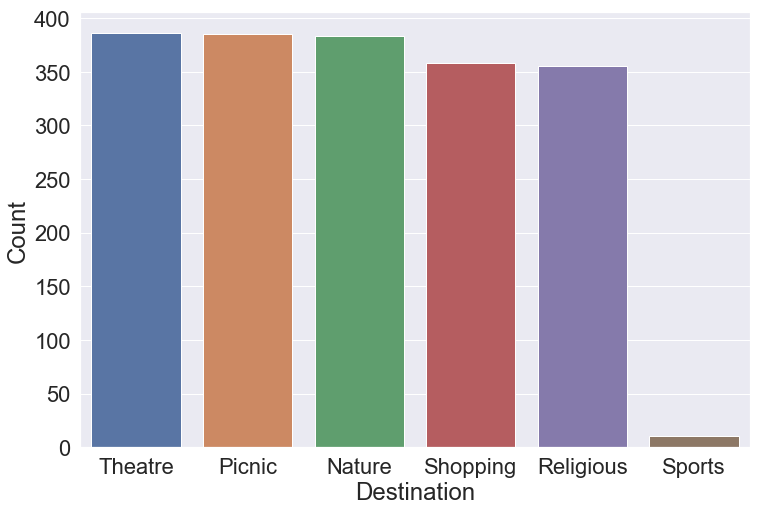

In [260]:
# Draw a barplot to show the insights.
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
Chart=sns.barplot(x='Destination', y='Count',data=df4)

1. Which class among the six has the highest frequency of reviews by the users
   
   Based on the table and chart above, the Theatre category has the highest frequency of reviews by the users and it is 386 Counts.

## Qi's dataset
1. Analyze the enrollment on different ethnicity by the level. 
2. Compare different institutions' enrollment by ethnicity.

In [217]:
# Read csv.file.
df = pd.read_csv('https://raw.githubusercontent.com/qxia2/DAV.5400/master/Qi_effy2017.csv')
df.head(10)

,Unique identification number of the institution,Level of student,Grand total,Grand total men,Grand total women,American Indian or Alaska Native total,American Indian or Alaska Native men,American Indian or Alaska Native women,Asian total,Asian men,...,White women,Two or more races total,Two or more races men,Two or more races women,Race/ethnicity unknown total,Race/ethnicity unknown men,Race/ethnicity unknown women,Nonresident alien total,Nonresident alien men,Nonresident alien women
0,100654,Undergraduate students,6392,2655,3737,15,4,11,23,14,...,171,224,82,142,14,5,9,71,44,27
1,100654,Undergraduate students,5207,2286,2921,11,3,8,12,6,...,55,210,82,128,11,4,7,38,23,15
2,100654,Graduate students,1185,369,816,4,1,3,11,8,...,116,14,0,14,3,1,2,33,21,12
3,100663,Undergraduate students,23196,9031,14165,62,26,36,1214,522,...,8372,791,300,491,374,156,218,1023,613,410
4,100663,Undergraduate students,13308,5528,7780,36,15,21,743,326,...,4188,522,210,312,198,89,109,364,232,132
5,100663,Graduate students,9888,3503,6385,26,11,15,471,196,...,4184,269,90,179,176,67,109,659,381,278
6,100690,Undergraduate students,868,341,527,2,1,1,3,1,...,63,0,0,0,265,124,141,0,0,0
7,100690,Undergraduate students,431,177,254,0,0,0,2,1,...,29,0,0,0,123,64,59,0,0,0
8,100690,Graduate students,437,164,273,2,1,1,1,0,...,34,0,0,0,142,60,82,0,0,0
9,100706,Undergraduate students,9897,5555,4342,113,69,44,375,201,...,2726,149,69,80,710,352,358,582,398,184


Things to do before answering the questions:
1. Clean the dataset by drop the redundant columns since the "Grand total" column is irrelevant to the question asked and the total column equals men plus women.
2. Change the dataset to "long" format.
3. Re-group the dataframe to show the enrollment of each ethnicity by each level.
4. Draw a barplot to have more intuitive insight.

### PS: According to the dataset dictionary, the "Total students enroll for credit" is under the "Undergraudate students" group.

In [218]:
# Clean the dataset by drop the columns that contains the "Grand total" and "men".
df = df[df.columns.drop(list(df.filter(regex='men')))]
df2 = df[df.columns.drop(list(df.filter(regex='Grand total')))]
df2.head(10)

,Unique identification number of the institution,Level of student,American Indian or Alaska Native total,Asian total,Black or African American total,Hispanic or Latino total,Native Hawaiian or Other Pacific Islander total,White total,Two or more races total,Race/ethnicity unknown total,Nonresident alien total
0,100654,Undergraduate students,15,23,5703,43,11,288,224,14,71
1,100654,Undergraduate students,11,12,4742,36,10,137,210,11,38
2,100654,Graduate students,4,11,961,7,1,151,14,3,33
3,100663,Undergraduate students,62,1214,5047,718,15,13952,791,374,1023
4,100663,Undergraduate students,36,743,3497,429,4,7515,522,198,364
5,100663,Graduate students,26,471,1550,289,11,6437,269,176,659
6,100690,Undergraduate students,2,3,347,87,5,159,0,265,0
7,100690,Undergraduate students,0,2,195,44,1,66,0,123,0
8,100690,Graduate students,2,1,152,43,4,93,0,142,0
9,100706,Undergraduate students,113,375,1015,377,3,6573,149,710,582


In [219]:
# Change the formation.
df2 = df2.melt (id_vars = ['Unique identification number of the institution', 'Level of student'])

# Rename "variable" and 'value' column.
df2.rename(columns = {'Unique identification number of the institution':'Institutions','variable':'Ethnicity','value':'Enrollment'}, inplace=True)
df2.head(10)

,Institutions,Level of student,Ethnicity,Enrollment
0,100654,Undergraduate students,American Indian or Alaska Native total,15
1,100654,Undergraduate students,American Indian or Alaska Native total,11
2,100654,Graduate students,American Indian or Alaska Native total,4
3,100663,Undergraduate students,American Indian or Alaska Native total,62
4,100663,Undergraduate students,American Indian or Alaska Native total,36
5,100663,Graduate students,American Indian or Alaska Native total,26
6,100690,Undergraduate students,American Indian or Alaska Native total,2
7,100690,Undergraduate students,American Indian or Alaska Native total,0
8,100690,Graduate students,American Indian or Alaska Native total,2
9,100706,Undergraduate students,American Indian or Alaska Native total,113


In [174]:
# Use "groupby" founction to re-group dataframe.
df3 = df2.groupby(['Ethnicity','Level of student']).sum()[['Enrollment']]
df3.columns = ['Enrollment']
df3

Enrollment
Ethnicity                                       Level of student                  
American Indian or Alaska Native total          Graduate students            17015
                                                Undergraduate students      374951
Asian total                                     Graduate students           225957
                                                Undergraduate students     2918603
Black or African American total                 Graduate students           451258
                                                Undergraduate students     6620580
Hispanic or Latino total                        Graduate students           340709
                                                Undergraduate students     9209919
Native Hawaiian or Other Pacific Islander total Graduate students             7729
                                                Undergraduate students      157065
Nonresident alien total                         Graduate students           496061
                                                Undergraduate students     1905345
Race/ethnicity unknown total                    Graduate students           297945
                                                Undergraduate students     2550347
Two or more races total                         Graduate students            83450
                                                Undergraduate students     1608238
White total                                     Graduate students          1969250
                                                Undergraduate students    24916916

[Text(0, 0, 'American Indian'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'African American'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Pacific Islander'),
 Text(0, 0, 'Nonresident alien'),
 Text(0, 0, 'Ethnicity unknown'),
 Text(0, 0, 'Two or more races'),
 Text(0, 0, 'White')]

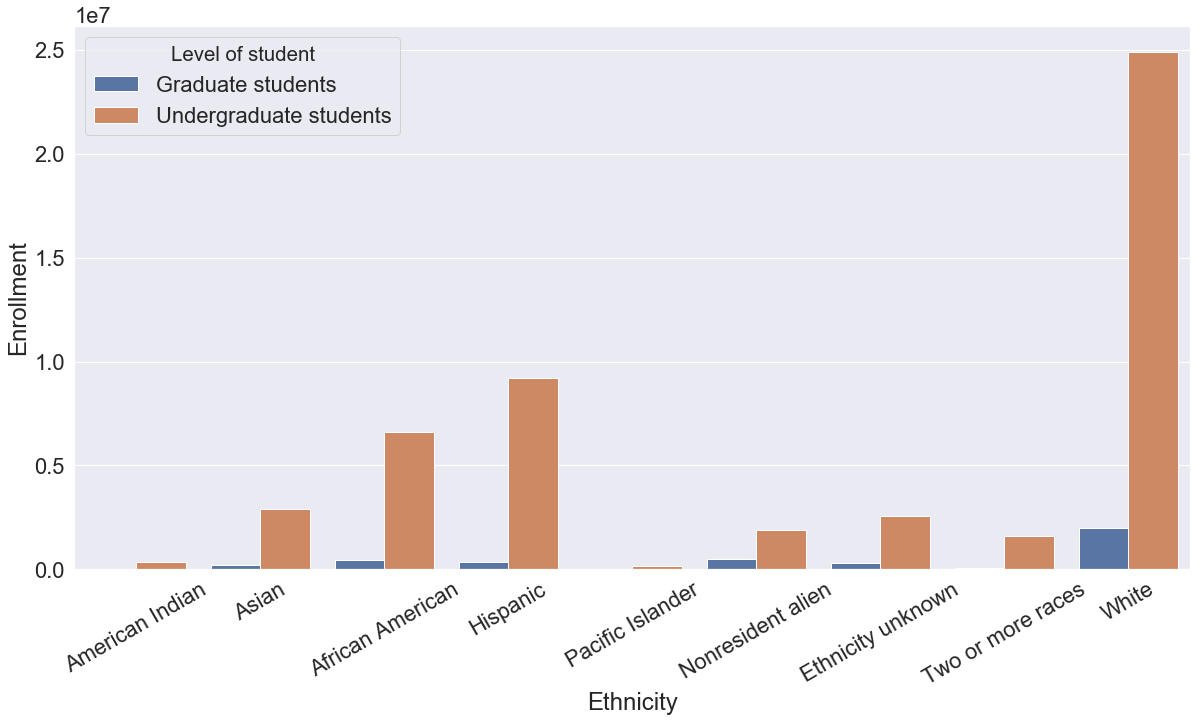

In [176]:
# Create a new datafame and use it to draw a barplot.
df4 = df2.groupby(['Ethnicity','Level of student'],as_index=False)['Enrollment'].sum()
df4
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
plot1=sns.barplot(x='Ethnicity', y='Enrollment',hue='Level of student',data=df4)
plot1.set_xticklabels(labels=['American Indian',
                              'Asian',
                              'African American',
                              'Hispanic',
                              'Pacific Islander',
                              'Nonresident alien',
                              'Ethnicity unknown',
                              'Two or more races',
                              'White'],
                      rotation=30)

According to the table and barplot above we can conclude that:
1. The amount undergraduate enrollments are much more than the graduate enrollments in each ethnicity group.
2. The "White" ethnicty group has highest number of both undergraduate and graduate enrollments.
3. The "Pafcific Islander" group has lowest number of both undergraduate and graduate enrollments.

In [220]:
# Use "groupby" and "unstack" function to re-format the dataset 
df5 = df2.groupby(['Institutions','Ethnicity'],as_index=False)['Enrollment'].sum()
df5.head(10)

,Institutions,Ethnicity,Enrollment
0,100654,American Indian or Alaska Native total,30
1,100654,Asian total,46
2,100654,Black or African American total,11406
3,100654,Hispanic or Latino total,86
4,100654,Native Hawaiian or Other Pacific Islander total,22
5,100654,Nonresident alien total,142
6,100654,Race/ethnicity unknown total,28
7,100654,Two or more races total,448
8,100654,White total,576
9,100663,American Indian or Alaska Native total,124


2. Compare different institutions' enrollment by ethnicity 
   
   According to the the original dataset, there are total 6785 institutions. Therefore it is hard to compare the them each by each. I think the better way is to compare the institutions the users intend to compare. For the assignment, I decide to compare the first5 Instruitions.

In [215]:
# Slicing first 5 institutions.
df6 = df5.head(45)
df6

,Institutions,Ethnicity,Enrollment
0,100654,American Indian or Alaska Native total,30
1,100654,Asian total,46
2,100654,Black or African American total,11406
3,100654,Hispanic or Latino total,86
4,100654,Native Hawaiian or Other Pacific Islander total,22
5,100654,Nonresident alien total,142
6,100654,Race/ethnicity unknown total,28
7,100654,Two or more races total,448
8,100654,White total,576
9,100663,American Indian or Alaska Native total,124


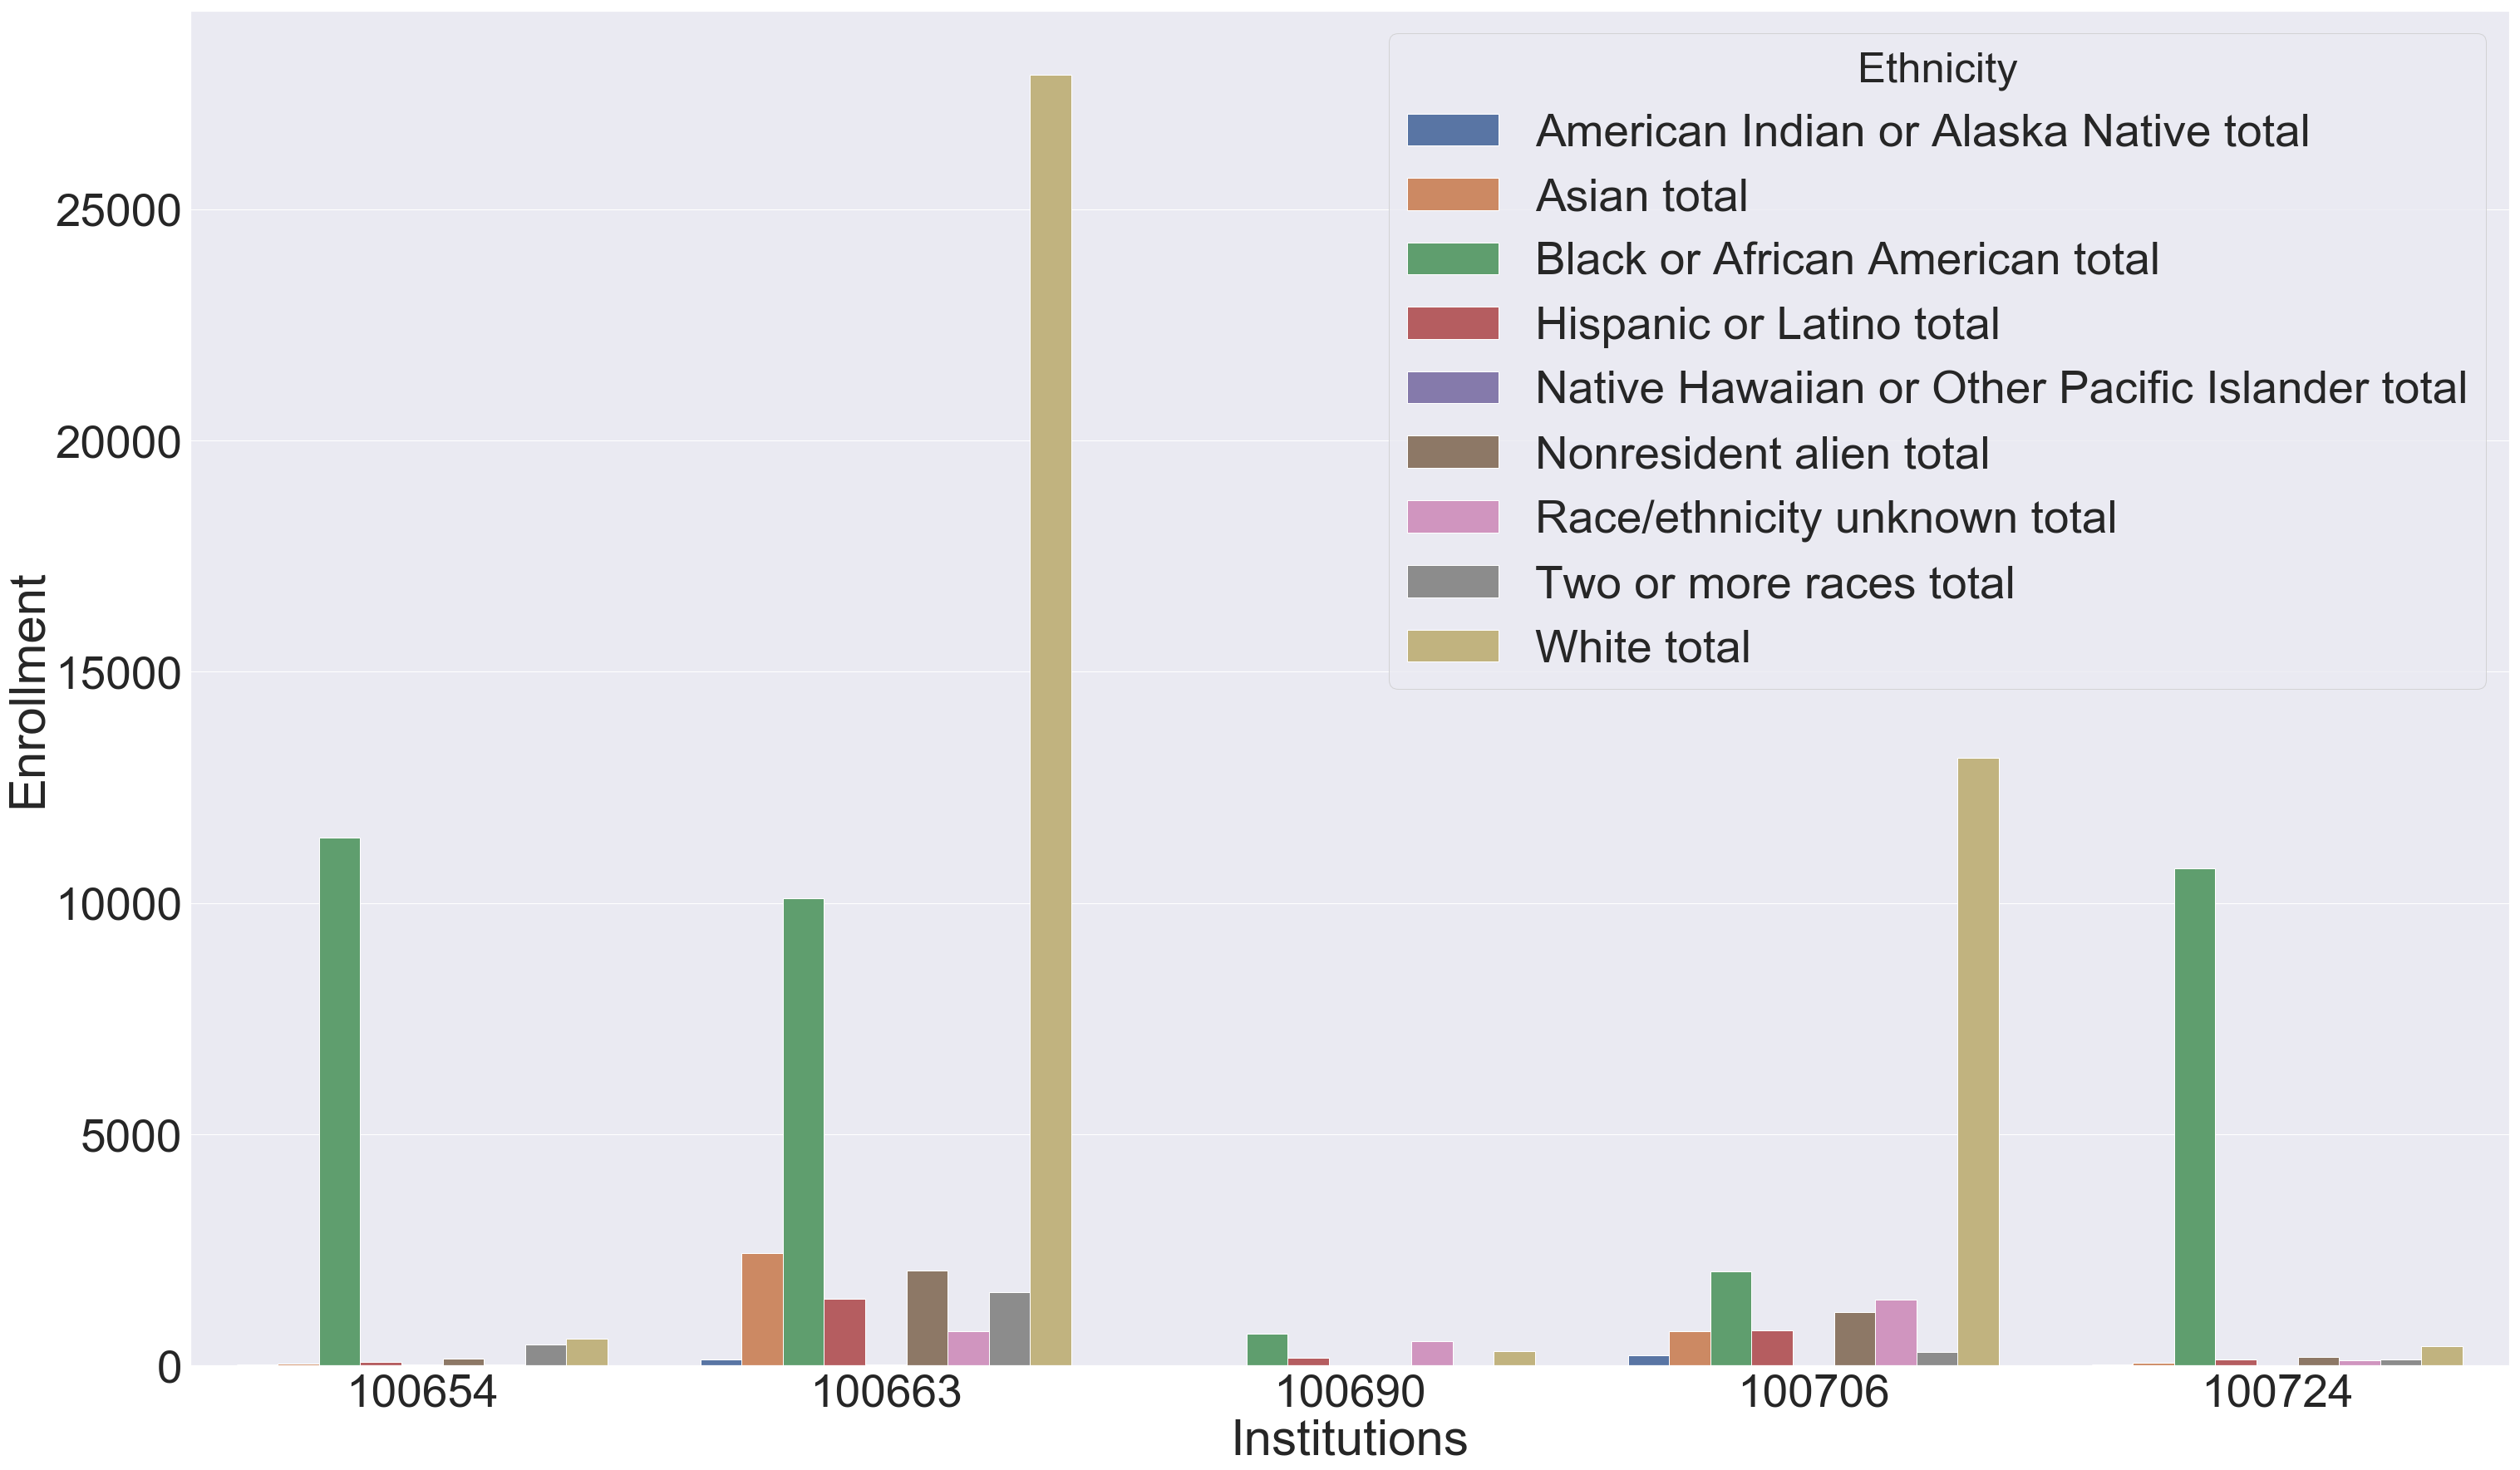

In [216]:
# Draw a barplot of this dataframe.
plt.figure(figsize=(50,30))
sns.set(font_scale=5)
plot2=sns.barplot(x='Institutions', y='Enrollment',hue='Ethnicity',data=df6)
plot2


According to the tabel and the barplot shown above we can conclude that:
1. The majority enrollments are from "White" group in instituition 100663 and 100706.
2. For the instuition 100654, 100690, and 100724, the majority enrollments are from "Afrian American" group.
3. The other ethnicity groups are minority enrollments in all 5 intituitions.

## Natan's dataset

The questions asked by Natan are following:
1. Which student had the highest average test grades?
2. Which student had the greatest range of test grades?
3. Which test had the highest grades?

In [261]:
# First, read Natan's data
df = pd.read_csv('https://raw.githubusercontent.com/qxia2/DAV.5400/master/Natan_student_test.csv')
df

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,NaN,86
3,Charles Barkey,NaN,89,NaN,76
4,Kenny Smith,80.0,81,79.0,85
5,Chris Webber,75.0,75,76.0,92
6,Jalen Rose,80.0,85,84.0,83
7,Jim Jackson,92.0,91,94.0,95


Things to do before answering the questions:
1. Leave the NaN value since in the really life there is a big chance that the student take four test but only pick two highest socre.
2. Change the dataset to "long" format.
3. Use "groupby" function to findout the student had the highest average test grades.
4. Use the "min" and "max" function and calculate the range use max minus min.
5. Use the "max" function groupby "Test".


In [262]:
# Checkout the data type.
df.dtypes

Name       object
Test 1    float64
Test 2      int64
Test 3    float64
Test 4      int64
dtype: object

In [263]:
# Change dataset to "long" form use the "melt" function
df2 = df.melt (id_vars = ['Name'], value_vars = ['Test 1','Test 2','Test 3','Test 4'])
df2

,Name,variable,value
0,Reggie Miller,Test 1,97.0
1,Dan Bonner,Test 1,76.0
2,Steve Smith,Test 1,84.0
3,Charles Barkey,Test 1,NaN
4,Kenny Smith,Test 1,80.0
5,Chris Webber,Test 1,75.0
6,Jalen Rose,Test 1,80.0
7,Jim Jackson,Test 1,92.0
8,Reggie Miller,Test 2,80.0
9,Dan Bonner,Test 2,68.0


In [264]:
# Rename the "variable" and "value"
df2.rename(columns = {'variable':'Test','value':'Score'}, inplace=True)
df2

,Name,Test,Score
0,Reggie Miller,Test 1,97.0
1,Dan Bonner,Test 1,76.0
2,Steve Smith,Test 1,84.0
3,Charles Barkey,Test 1,NaN
4,Kenny Smith,Test 1,80.0
5,Chris Webber,Test 1,75.0
6,Jalen Rose,Test 1,80.0
7,Jim Jackson,Test 1,92.0
8,Reggie Miller,Test 2,80.0
9,Dan Bonner,Test 2,68.0


In [268]:
# Use "groupby" and "mean" function to show the student have highest average test socre.
df3 = df2.groupby(['Name']).mean()[['Score']]
df3.columns = ['Average grades']
df3.sort_values(by='Average grades',ascending=False)

,Average grades
Name,
Jim Jackson,93.000000
Reggie Miller,88.750000
Jalen Rose,83.000000
Charles Barkey,82.500000
Steve Smith,81.666667
Kenny Smith,81.250000
Chris Webber,79.500000
Dan Bonner,76.250000


1. Which student had the highest average test grades?

   According to the table above, the student who has the highest test grade is Jim Jackon.

In [37]:
# Use "max()-min()" to get the range of test grades  
df4 = df2.groupby(['Name']).max()[['Score']]-df2.groupby(['Name']).min()[['Score']]
df4.columns = ['Range']
df4.sort_values(by='Range',ascending=False)

,Range
Name,
Chris Webber,17.0
Reggie Miller,17.0
Charles Barkey,13.0
Dan Bonner,13.0
Steve Smith,11.0
Kenny Smith,6.0
Jalen Rose,5.0
Jim Jackson,4.0


2. Which student had the greatest range of test grades?
   
   According to the table above the student who had the greatest range of test grades are Chris Webber and Reggie Miller since both of them have range of 17 points.

In [269]:
# Use "groupby" by "Test"
df5 = df2.groupby(['Test'],as_index=False)['Score'].max()
df5

,Test,Score
0,Test 1,97.0
1,Test 2,91.0
2,Test 3,94.0
3,Test 4,95.0


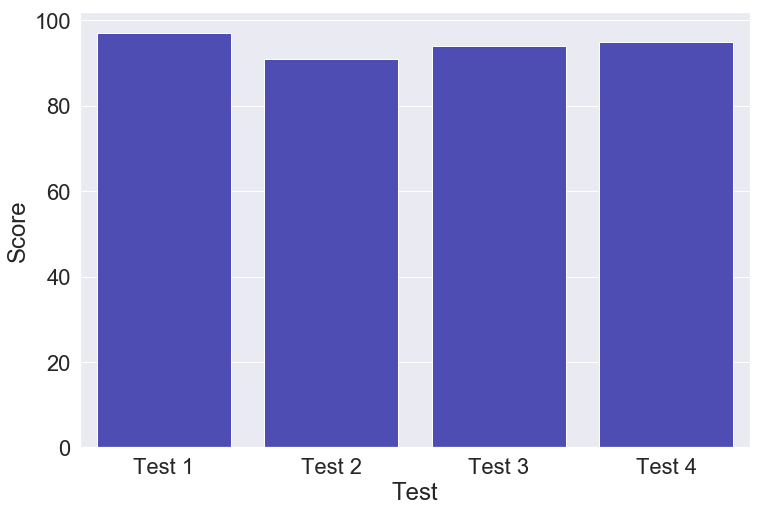

In [288]:
# Draw a barplot to visualize the table.
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
plot3=sns.barplot(x='Test', y='Score', color='blue', saturation= 0.4,data=df5)
plot3

3. Which test had the highest grades?

   According to the table and bar plot above the Test 1 has the highest score and that is 97 points.